In [1]:
import numpy as np
import matplotlib.pyplot as plt
import fonction_stage as st
from numpy.fft import fft 
from numpy.fft import ifft 
import scipy as sp
from scipy.signal import butter, lfilter, filtfilt
from scipy.signal import freqz

In [9]:
######### A MODIFIER ###########

data=np.loadtxt('gao3.txt')
name='gao3'
tsimu=1.6
Nrec=80

mail_fmax=60 #Hz
################################

ech=np.size(data)/Nrec
ech=int(ech)
dt=tsimu/ech
fmax=1/dt
fNy=fmax/2
df=1/tsimu

data=np.reshape(data, np.size(data))
data=np.reshape(data, (ech,Nrec))

np.shape(data)

print("ech, nombre de points du signal =",ech)
print("dt, pas de temps", dt)
print("fmax, fech =",fmax)
print("fNy=", fNy)
print("df, pas en fréquence=", df)

ech, nombre de points du signal = 24616
dt, pas de temps 6.4998375040624e-05
fmax, fech = 15384.999999999998
fNy= 7692.499999999999
df, pas en fréquence= 0.625


6.500101564086937e-05


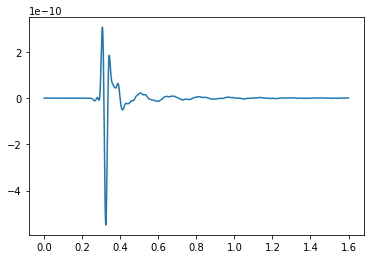

In [10]:
tmin=0+dt
tmax=tsimu+dt
temps=np.linspace(tmin,tmax,ech)

plt.figure
plt.plot(temps, data[:,0])
print(temps[2]-temps[1])

(24616, 80)


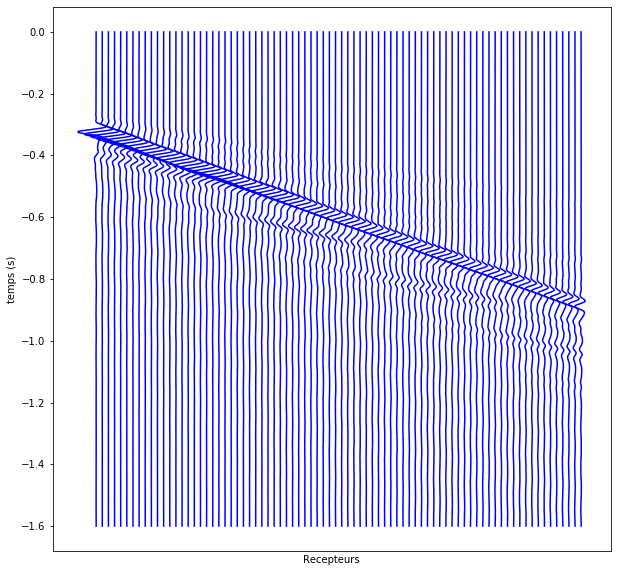

In [11]:
aux=np.max(np.abs(data))
vecteur=np.linspace(0,(aux/3)*Nrec,Nrec)

mat=np.ones((ech,1))*vecteur
print(np.shape(mat))
data_p=data+mat

plt.figure(figsize=(10,10))
plt.plot(data_p,-temps, 'b')
plt.xlabel("Recepteurs")
plt.ylabel("temps (s)")
plt.xticks([]) ;

figwave="wave.png"
namefigwave=name+figwave
plt.savefig(namefigwave)

In [12]:
recp=np.linspace(1,Nrec,Nrec)
freq=np.arange(0+df,fmax+df,df)

print(np.shape(freq))

(24616,)


In [13]:
ntemps, nrecp = (Nrec, ech)
nrecp, ntemps = np.meshgrid(recp, temps)

nfreq, nrecp = (Nrec, ech)
nrecp, nfreq = np.meshgrid(recp, freq)

np.shape(nfreq)

(24616, 80)

Text(0, 0.5, 'y')

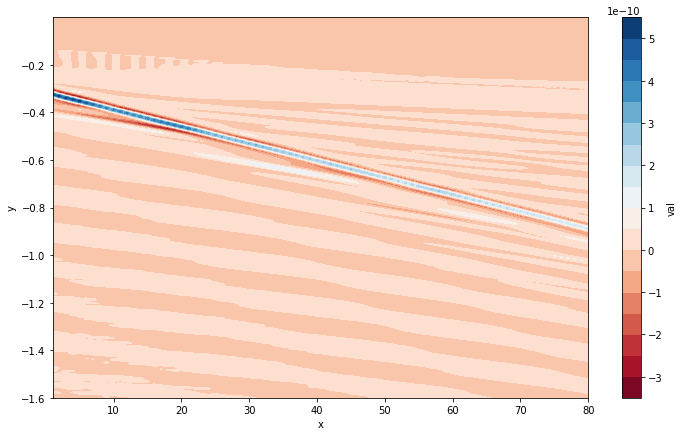

In [14]:
plt.figure(figsize= (12,7))
cf = plt.contourf(nrecp,-ntemps,-data,20, cmap='RdBu')
plt.colorbar(label = 'val')
plt.contour(cf,colors = 'k',linewidths = 0,alpha=0.5)
plt.xlabel('x')
plt.ylabel('y')

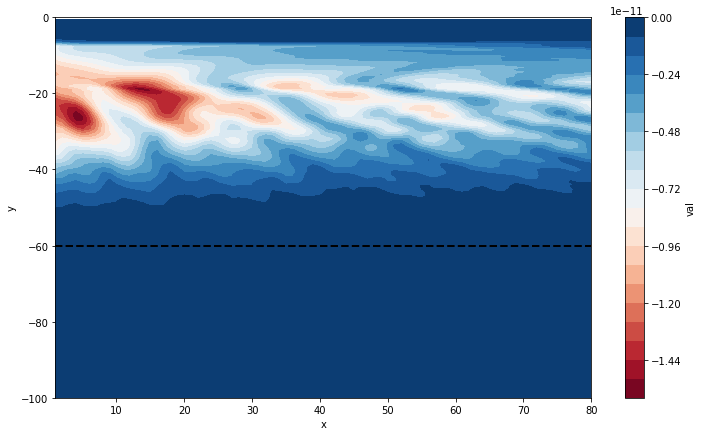

In [15]:
### spectre en fréquence du tir ###

size=(ech, Nrec)
specfx=np.zeros(size)

for i in range (Nrec):
    signal=data[:,i]
    t= temps
    tfd = fft(signal)
    N=len(signal)
    spectre = np.absolute(tfd)*2/N
    T=max(t)
    specfx[:,i]=spectre
    
plt.figure(figsize= (12,7))
cf = plt.contourf(nrecp,-nfreq,-specfx,20, cmap='RdBu')
plt.colorbar(label = 'val')
plt.contour(cf,colors = 'k',linewidths = 0,alpha=0.5)
plt.xlabel('x')
plt.ylabel('y')
plt.ylim(-100,0)

mail_fmax=60 #Hz

plt.plot([1, 80],[-mail_fmax, -mail_fmax],  'k--', lw=2) # Blue dashed straight line

(0, 100)

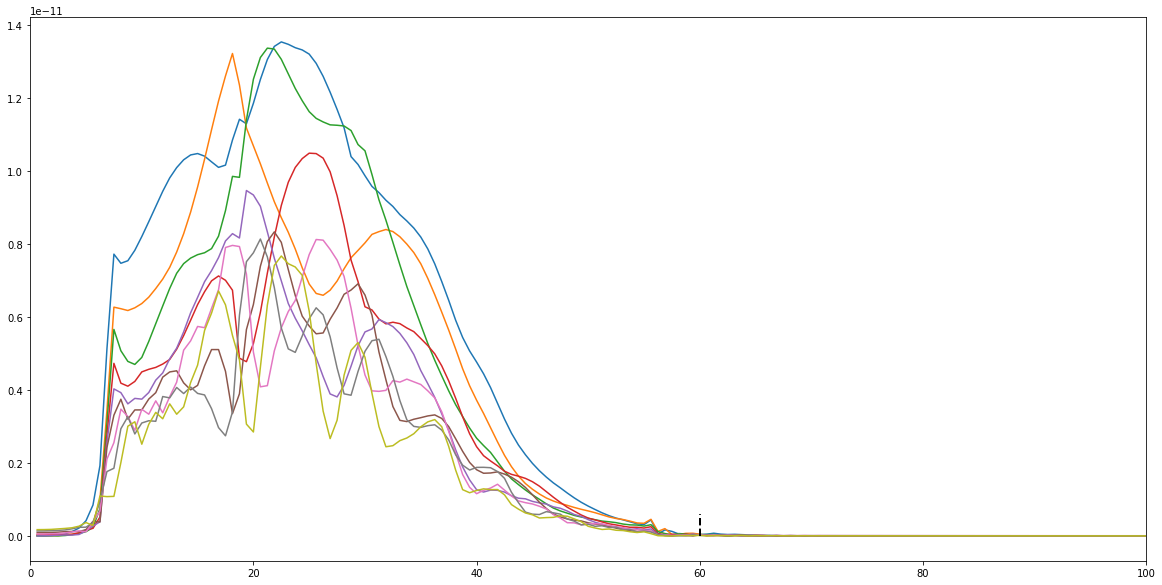

In [27]:
plt.figure(figsize=(20,10))
plt.plot(freq,specfx[:,0])
plt.plot(freq,specfx[:,9])
plt.plot(freq,specfx[:,19])
plt.plot(freq,specfx[:,29])
plt.plot(freq,specfx[:,39])
plt.plot(freq,specfx[:,49])
plt.plot(freq,specfx[:,59])
plt.plot(freq,specfx[:,69])
plt.plot(freq,specfx[:,79])

plt.plot([mail_fmax, mail_fmax],[0, 0.0000000000006],  'k--', lw=2)
plt.xlim(0,100)

In [28]:
## fitrage des données ##

def butter_lowpass(fcut, fs, order=5):
    nyq = 0.5 * fs
    cut= fcut / nyq
    b, a = butter(order, cut, btype='low')
    return b, a

def butter_lowpass_filter(data, fcut, fs, order=5):
    b, a = butter_lowpass(fcut,fs, order=order)
    y = filtfilt(b, a, data)
    return y


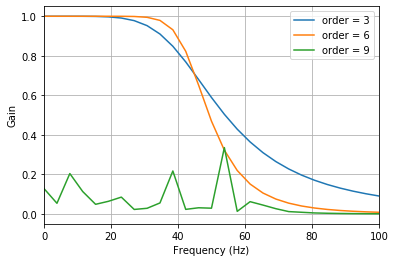

In [29]:
# cutoff frequencies (in Hz).
fcut= 45
fs=1/dt


# Plot the frequency response for a few different orders.
plt.figure(1)

for order in [3, 6, 9]:
    b, a = butter_lowpass(fcut, fs, order=order)
    w, h = freqz(b, a, worN=2000)
    plt.plot((fs * 0.5 / np.pi) * w, abs(h), label="order = %d" % order)

plt.xlabel('Frequency (Hz)')
plt.xlim(0,100)
plt.ylabel('Gain')
plt.grid(True)
plt.legend(loc='best')


Text(0, 0.5, 'y')

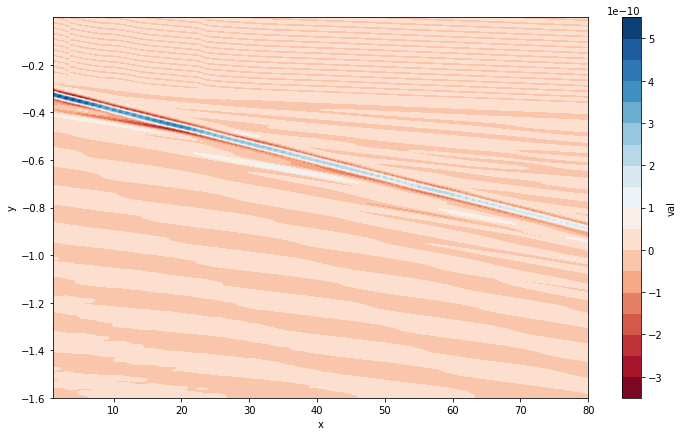

In [30]:
#choose order 
order=6
nsamples = ech
data_f=np.zeros(size)

# Filter a signal.
for i in range (Nrec):
    x = data[:,i]
    y = butter_lowpass_filter(x, fcut, fs, order=order)
    data_f[:,i]=y
    
plt.figure(figsize= (12,7))
cf = plt.contourf(nrecp,-ntemps,-data_f,20, cmap='RdBu')
plt.colorbar(label = 'val')
plt.contour(cf,colors = 'k',linewidths = 0,alpha=0.5)
plt.xlabel('x')
plt.ylabel('y')

In [31]:
savetxtf="_filtre.txt"
namefigfil=name+savetxtf
np.savetxt(namefigfil, data_f)

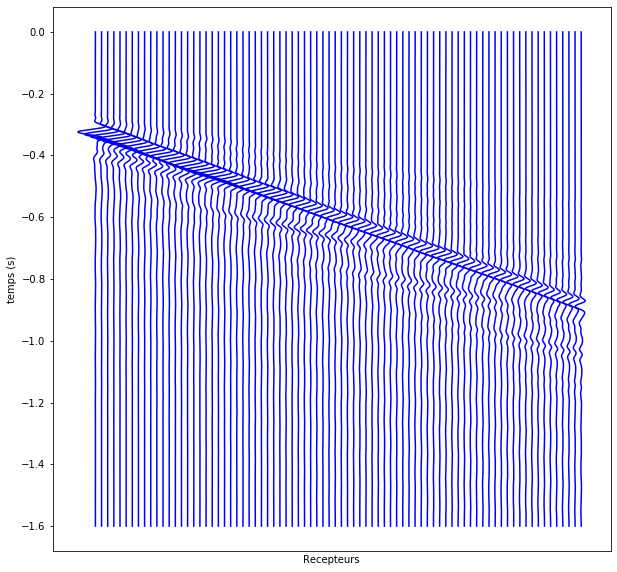

In [32]:
data_p=data_f+mat

plt.figure(figsize=(10,10))
plt.plot(data_p,-temps, 'b') ;
plt.xlabel("Recepteurs")
plt.ylabel("temps (s)")
plt.xticks([]) ;

figwavefil="wave_filtre.png"
namefigwavefil=name+figwavefil
plt.savefig(namefigwavefil)

(-80, 0)

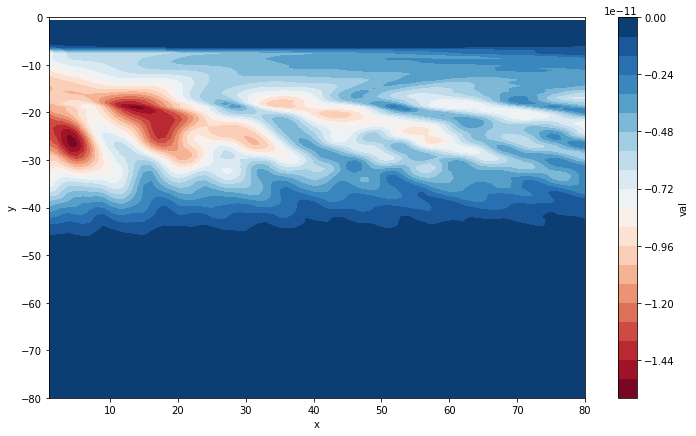

In [33]:
specfx_f=np.zeros(size)
specfx_f_i=np.zeros(size, dtype=complex)

for i in range (Nrec):
    signal=data_f[:,i]
    t= temps
    tfd = fft(signal)
    N=len(signal)
    spectre = np.absolute(tfd)*2/N
    T=max(t)
    
    nrecp, nfreq = np.meshgrid(recp, freq)
    specfx_f_i[:,i]=tfd
    specfx_f[:,i]=spectre

plt.figure(figsize= (12,7))
cf = plt.contourf(nrecp,-nfreq,-specfx_f,20, cmap='RdBu')
plt.colorbar(label = 'val')
plt.contour(cf,colors = 'k',linewidths = 0,alpha=0.5)
plt.xlabel('x')
plt.ylabel('y')
plt.ylim(-80,0)

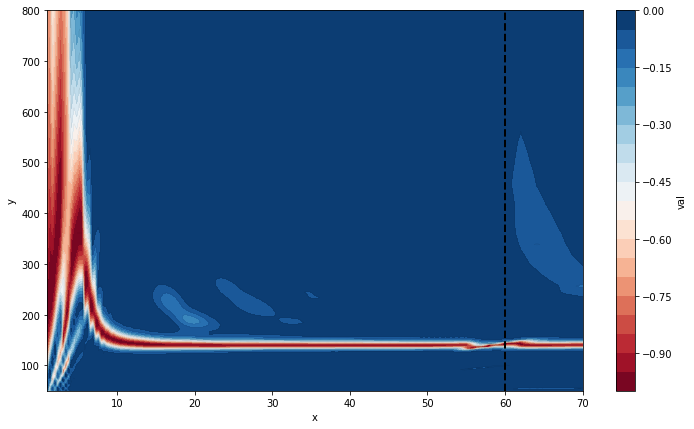

In [34]:
file="gao3b.dc"
 
data = np.loadtxt(file,skiprows = 1)
    
x = np.reshape(data[:,0],(-1,len(np.unique(data[:,0]))))
y = 1/(np.reshape(data[:,1],(-1,len(np.unique(data[:,0])))))
z = np.reshape(data[:,2],(-1,len(np.unique(data[:,0]))))
    
plt.figure(figsize= (12,7))
cf = plt.contourf(x,y,-z,20, cmap='RdBu')
plt.colorbar(label = 'val')
plt.contour(cf,colors = 'k',linewidths = 0.1,alpha=0.5)
plt.xlabel('x')
plt.ylabel('y')
plt.plot([mail_fmax, mail_fmax],[50, 800],  'k--', lw=2)



wlmax1 (pour wl max < L) = 90 m
wlmax2 (pour wl max < 2*x1) = 20 m
wlmax3 (wl max < 0.4L) = 36.0 m
wlmax4 (edf : wl< 0.5L)= 45.0 m
wlmax5 (pour wl max < 4*x1) = 40 m
wlmin (pour aliasing quand wl < 2*dx)= 2 m
wlmin2 (edf wl < dx)= 1 m


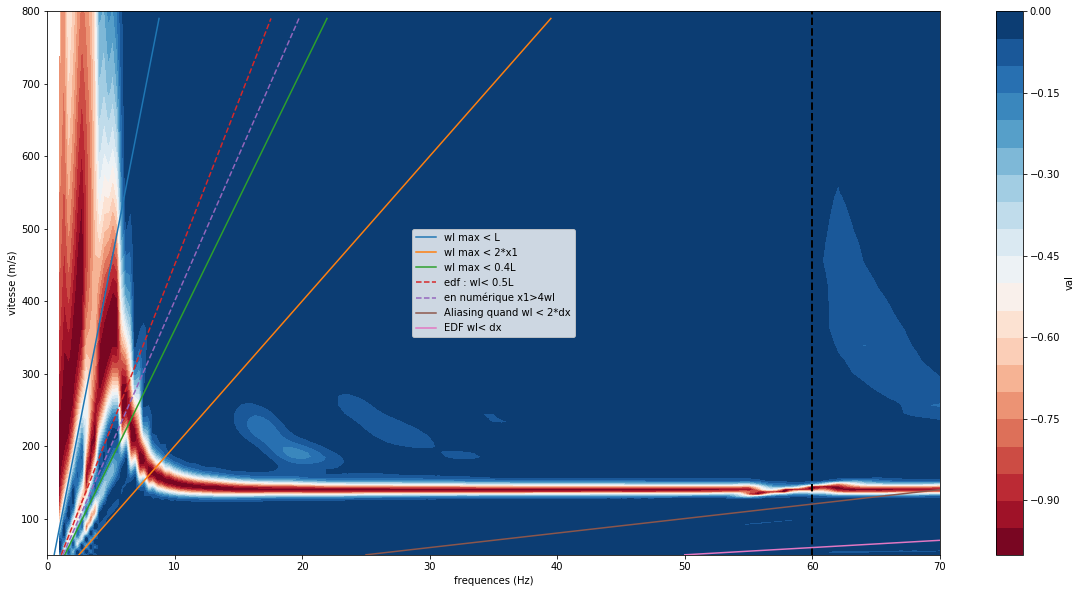

In [35]:
#courbes limites
L=90
x1=10
dx=1

wlmax1=L  #wlmax est la longueur d'onde max que l'on peux mesurer de façon fiable, au delà non fiable
print('wlmax1 (pour wl max < L) =', wlmax1, 'm')

wlmax2=2*x1
print('wlmax2 (pour wl max < 2*x1) =', wlmax2, 'm')

wlmax3=0.4*L
print('wlmax3 (wl max < 0.4L) =', wlmax3, 'm')
    
wlmax4=0.5*L
print('wlmax4 (edf : wl< 0.5L)=', wlmax4, 'm')

wlmax5=4*x1
print('wlmax5 (pour wl max < 4*x1) =', wlmax5, 'm')

wlmin=2*dx
print('wlmin (pour aliasing quand wl < 2*dx)=', wlmin, "m")
    
wlmin2=dx
print('wlmin2 (edf wl < dx)=', wlmin2, "m")

#plot
plt.figure(figsize=(20,10))
cf = plt.contourf(x,y,-z,20, cmap='RdBu')
plt.colorbar(label = 'val')
plt.contour(cf,colors = 'k',linewidths = 0,alpha=0.5)
plt.xlabel('x')
plt.ylabel('y')
plt.plot([mail_fmax, mail_fmax],[50, 800],  'k--', lw=2)



v=np.arange(50,800,10)         
fmin1=v/wlmax1
fmin2=v/wlmax2
fmin3=v/wlmax3
fmin4=v/wlmax4
fmin5=v/wlmax5
fmax=v/wlmin
fmax2=v/wlmin2

plt.plot(fmin1,v, label="wl max < L") #ne pas oublier de changer la legende
plt.plot(fmin2,v,  label="wl max < 2*x1")
plt.plot(fmin3,v,  label="wl max < 0.4L ")
plt.plot(fmin4,v, '--', label="edf : wl< 0.5L")
plt.plot(fmin5,v, '--', label="en numérique x1>4wl")
plt.plot(fmax,v, label="Aliasing quand wl < 2*dx")
plt.plot(fmax2,v, label="EDF wl< dx")
plt.xlim(0,70)
plt.xlabel('frequences (Hz)')
plt.ylabel('vitesse (m/s)')
plt.legend()

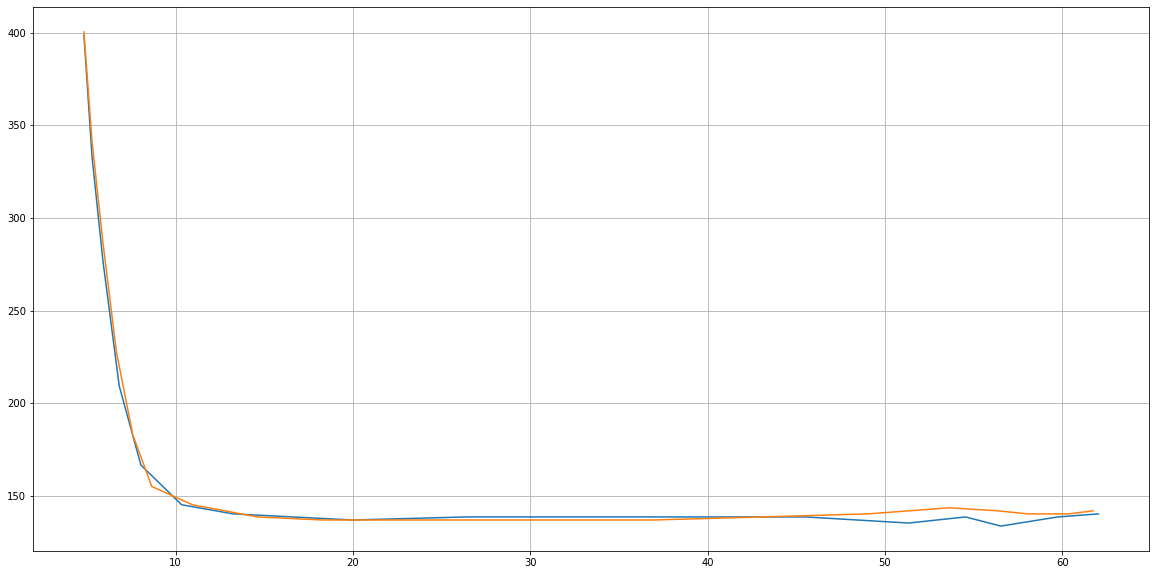

In [36]:
plt.figure(figsize=(20,10))

disp = np.loadtxt("gao3b.disp")
disp_f = np.loadtxt("gao3b_f.disp")
plt.plot(disp[:,0],1/disp[:,1])
plt.plot(disp_f[:,0],1/disp_f[:,1])
plt.grid()